 # Assignment 1-2: Data Collection Using Web APIs

 ## Objective

 Many websites (such as Twitter, Yelp, Spotify) provide free APIs to allow users to access their data. In this assignment, you will learn the following:



 * How to ask insightful questions about data.

 * How to collect data from Web APIs using standard Python libraries.



 **Requirements:**



 1. Use [pandas.DataFrame](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html) to manipulate data.



 2. Follow the Python code style guide (https://www.python.org/dev/peps/pep-0008/). If your code is hard to read, you may lose points. This requirement will stay for the whole semester.

 ## Preliminary

 To complete this assignment, you will use Python libraries such as:



 - `requests` to make HTTP requests to the API.

 - `json` to parse JSON responses.

 - `pandas` to process and manipulate data.



 Before starting, you can refer to these tutorials:



 * [Python `requests` library](https://realpython.com/python-requests/)

 * [Working with JSON in Python](https://realpython.com/python-json/)

 * [Pandas basics](https://pandas.pydata.org/docs/user_guide/10min.html)

## Finding APIs



 If you're unsure which API to explore, here are some useful resources:

 - [Public APIs GitHub Repository](https://github.com/public-apis/public-apis): A curated list of free APIs for development.



 Make sure the API you choose aligns with the assignment requirements and provides sufficient data to answer your questions.

 ## Overview

 This is a **group** assignment.

 Please check your group in this [Spreadsheet](https://1sfu-my.sharepoint.com/:x:/g/personal/sbergner_sfu_ca/EfiqKEqv4_pGgGjG0CvYBN4BvNM4FnJ-SvBAkIqVKN-iJA?e=LhVSqk).



 To complete this assignment, your group needs to go through the following steps:



 1. Select a new Web API

 2. Explore the API documentation to understand its capabilities and endpoints.

 3. Formulate four questions that can be answered using the API.

 4. Write Python code to query the API and answer these questions.



 ### Step 3: Formulating Questions

 Good questions should:

 - Be **useful**, answering common or novel data use cases.

 - Be **diverse**, covering various endpoints or use cases.

 - Have a range of **difficulty**, from simple (few parameters) to complex (multiple parameters or computations).

 ### Example Questions (Yelp API)



 * Q1. What's the phone number of Capilano Suspension Bridge Park?

 * Q2. Which yoga store has the highest review count in Vancouver?

 * Q3. How many Starbucks stores are in Seattle and where are they located?

 * Q4. What are the ratings for a list of restaurants?



 These questions vary in usefulness, diversity, and complexity.

 ## Now, it's your turn! :)

 ### Instructions:

 1. Choose an API and obtain access credentials (e.g., API key).

 2. Write Python functions to query the API.

 3. Answer each question using the API data.

 4. Use `pandas` to format and display your results.

In [1]:
## Provide your API key here for TAs to reproduce your results
API_KEY = "21a69f8f69a8a28cd5128b90e95e8a9f"


 ### Q0: What is the current temperature in Vancouver?

In [2]:
import requests

def fetch_data(endpoint):
    try:
        response = requests.get(endpoint)
        response.raise_for_status()  # Raise an error for bad responses (4XX, 5XX)
        return response.json()
    except requests.exceptions.RequestException as e:
        print(f"An error occurred: {e}")
        return None

city_name = 'Vancouver, Canada'
response = fetch_data(f"https://api.openweathermap.org/data/2.5/weather?q={city_name}&units=metric&appid={API_KEY}")
print(f"The current temperature in Vancouver is: {response['main']['temp']} degrees celsius")


The current temperature in Vancouver is: 5.02 degrees celsius


 ### Q1: What is the average wind speed across major cities in BC?

In [7]:
import requests

def fetch_data(endpoint):
    try:
        response = requests.get(endpoint)
        response.raise_for_status()  # Raise an error for bad responses (4XX, 5XX)
        return response.json()
    except requests.exceptions.RequestException as e:
        print(f"An error occurred: {e}")
        return None
province = 'British Columbia,CA'
cities = [
    "Vancouver", "Richmond", "Surrey", "Burnaby", "Coquitlam",
    "North Vancouver", "West Vancouver", "Langley", "Abbotsford",
    "Chilliwack", "Victoria", "Delta", "Kelowna", "Kamloops", "Prince George"
]
avg = 0
for city in cities:
    response = fetch_data(f"https://api.openweathermap.org/data/2.5/weather?q={city}&units=metric&appid={API_KEY}")
    if response: 
        avg += response['wind']['speed']
avg = avg / len(cities)
print(f"The average wind speed in major cities of British Columbia is: {avg}km/h")

The average wind speed in major cities of British Columbia is: 2.1386666666666665km/h


 ### Q2: What cities have a temperature above 0 celsius?

In [4]:
import requests

def fetch_data(endpoint, params, headers=None):
    try:
        response = requests.get(endpoint, params=params, headers=headers, timeout=10)
        response.raise_for_status()  # Raise an error for bad responses (4XX, 5XX)
        return response.json()
    except requests.exceptions.RequestException as e:
        print(f"An error occurred: {e}")
        return None


# function to filter cities by temperature threshold
def filter_cities_by_temperature(cities, threshold, api_key):
    endpoint = "https://api.openweathermap.org/data/2.5/weather"
    result = []

    for city_name in cities:
        params = {
            "q": f"{city_name},CA",  # Adding country Canada
            "units": "metric",
            "appid": api_key
        }

        response = fetch_data(endpoint, params)

        # check if response contains valid data
        if response and response.get("main") and response["main"].get("temp"):
            temperature = response["main"]["temp"]
            if temperature > threshold:
                result.append(f"{city_name}: {temperature}")

    return result


cities = [
    "Vancouver", "Richmond", "Surrey", "Burnaby", "Coquitlam",
    "North Vancouver", "West Vancouver", "Langley", "Abbotsford",
    "Chilliwack", "Victoria", "Delta", "Kelowna", "Kamloops", "Prince George"
]
threshold = 0
result = filter_cities_by_temperature(cities, threshold, API_KEY)

if result:
    print("Cities with temperature above 0 celsius:")
    for city in result:
        print(f"{city}")
else:
    print("No cities found with temperature above 0 celsius.")


Cities with temperature above 0 celsius:
Vancouver: 5.11
Richmond: 5.18
Surrey: 4.37
Burnaby: 4.87
Coquitlam: 5.1
North Vancouver: 5.22
West Vancouver: 5.48
Langley: 3.64
Abbotsford: 3.4
Chilliwack: 4.99
Victoria: 5.49
Delta: 4.42
Kelowna: 2.01
Prince George: 2.1


 ### Q3: Optional - Visualizing data: What is the temperature forecasted for Vancouver for the next week?

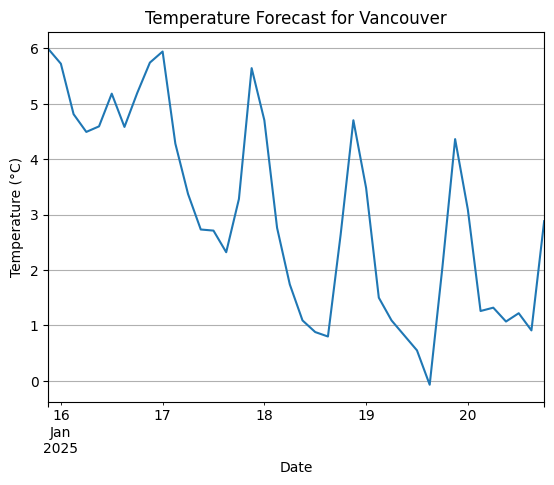

In [6]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

def fetch_forecast():
    endpoint = "https://api.openweathermap.org/data/2.5/forecast"
    params = {
        "lat": 49.25,
        "lon": -123.08,
        "units": "metric",
        "appid": API_KEY}
    try:
        response = requests.get(endpoint, params=params)
        response.raise_for_status()  
        return response.json()
    except requests.exceptions.RequestException as e:
        print(f"An error occurred: {e}")
        return None

def visualize_forecast():
    data = fetch_forecast()

    if data and "list" in data:
        #Extract timestamps and temperatures
        timestamps = [item["dt_txt"] for item in data["list"]]
        temperatures = [item["main"]["temp"] for item in data["list"]]

        #Create df for visualization
        df = pd.DataFrame({"Timestamp": timestamps, "Temperature (°C)": temperatures})
        df["Timestamp"] = pd.to_datetime(df["Timestamp"])
        df.set_index("Timestamp", inplace=True)

        #Plot
        df.plot(kind="line", legend=False)
        plt.title("Temperature Forecast for Vancouver")
        plt.xlabel("Date")
        plt.ylabel("Temperature (°C)")
        plt.grid(True)
        plt.xticks(rotation=45)
        plt.show()
    else:
        print("No data available.")

visualize_forecast()

 ## Submission

 Complete this notebook, rename it to `A1-2.ipynb`, and submit it along with any necessary credentials or configuration files to the CourSys activity [`Assignment 1 - Part 2`](https://coursys.sfu.ca/2025sp-cmpt-733-g1/+a1-2/).

 ## Submission Checklist



 - [ ] Completed notebook file (`A1-2.ipynb`).

 - [ ] Included API keys or other necessary credentials (if applicable).

 - [ ] Verified that questions and answers are documented with meaningful titles.

 - [ ] Optional visualizations are added to enhance insights.